In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re
from pywaffle import Waffle
import squarify


plt.style.use('ggplot')
%matplotlib inline

In [59]:
df_producers = pd.read_excel("SIPRI-Top-100-2002-2016 (1).xlsx", skiprows=3)
df_producers.tail(10)

,Rank (2016) *Note (b),Rank (2015),Company (2016) *Note (c),Notes (2016),Country (2016),Arms Sales (2016),Arms sales 2015 (constant 2016 prices) note (d),Total Sales (2016),Arms sales as a % of total sales (2016),Total profit (2016),Total employment (2016)
106,96,105,Bharat Dynamics,NaN,India,730.0,651.225,726,100,--,--
107,97,100,Ultra Electronics,NaN,United Kingdom,720.0,604.815,1061,68,92,4000
108,S,S,Raytheon Australia (Raytheon USA),NaN,Australia,720.0,721.538,717,100,--,1170
109,98,97,Navantia,NaN,Spain,710.0,737,801,88,-336,5510
110,99,79,Mitsubishi Electric Corp.,NaN,Japan,700.0,989,38928,2,1932,--
111,100,101,Poongsan Corp.,NaN,South Korea,700.0,650,1753,40,119,3580
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_producers.tail()

,Rank (2016) *Note (b),Rank (2015),Company (2016) *Note (c),Notes (2016),Country (2016),Arms Sales (2016),Arms sales 2015 (constant 2016 prices) note (d),Total Sales (2016),Arms sales as a % of total sales (2016),Total profit (2016),Total employment (2016)
111,100,101,Poongsan Corp.,NaN,South Korea,700.0,650,1753,40,119,3580
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_producers.dtypes

Rank (2016) *Note (b)                               object
Rank (2015)                                         object
Company (2016) *Note (c)                            object
Notes (2016)                                        object
Country (2016)                                      object
Arms Sales (2016)                                  float64
Arms sales 2015 (constant 2016 prices) note (d)     object
Total Sales (2016)                                  object
Arms sales as a % of total sales (2016)             object
Total profit (2016)                                 object
Total employment (2016)                             object
dtype: object

In [62]:
df_producers.drop(['Notes (2016)'], axis = 1, inplace = True)
df_producers.head()

,Rank (2016) *Note (b),Rank (2015),Company (2016) *Note (c),Country (2016),Arms Sales (2016),Arms sales 2015 (constant 2016 prices) note (d),Total Sales (2016),Arms sales as a % of total sales (2016),Total profit (2016),Total employment (2016)
0,1,1,Lockheed Martin Corp.,United States,40830.0,36899.7,47248,86,5302,97000
1,2,2,Boeing,United States,29510.0,28312.7,94571,31,4895,150500
2,3,4,Raytheon,United States,22910.0,22054.8,24069,95,2174,63000
3,4,3,BAE Systems,United Kingdom,22790.0,22689.4,24008,95,2351,83000
4,5,5,Northrop Grumman Corp.,United States,21400.0,20313.1,24508,87,2200,67000


In [63]:
df_producers.rename(columns={'Rank (2016) *Note (b)':'rank_2016',
                          'Rank (2015)':'rank_2015',
                          'Company (2016) *Note (c)':'company_name',
                            'Country (2016)':'country',
                            'Arms Sales (2016)':'arms_sales_2016',
                            'Arms sales 2015 (constant 2016 prices) note (d)':'arms_sales_2015',
                            'Total Sales (2016)':'total_sales_2016',
                            'Arms sales as a % of total sales (2016)':'arms_sales_percentage_of_total_2016',
                            'Total profit (2016)':'total_profit_2016',
                            'Total employment (2016)':'total_employment_2016'}, inplace=True)

df_producers.head(20)

,rank_2016,rank_2015,Company (2016) *Note (c),Country (2016),arms_sales_2016,arms_sales_2015,total_sales_2016,arms_sales_percentage_of_total_2016,total_profit_2016,total_employment_2016
0,1,1,Lockheed Martin Corp.,United States,40830.0,36899.7,47248,86,5302,97000
1,2,2,Boeing,United States,29510.0,28312.7,94571,31,4895,150500
2,3,4,Raytheon,United States,22910.0,22054.8,24069,95,2174,63000
3,4,3,BAE Systems,United Kingdom,22790.0,22689.4,24008,95,2351,83000
4,5,5,Northrop Grumman Corp.,United States,21400.0,20313.1,24508,87,2200,67000
5,6,6,General Dynamics Corp.,United States,19230.0,19482.7,31353,61,2955,98800
6,7,7,Airbus Group,Trans-European,12520.0,12869.1,73652,17,1101,133780
7,S,S,BAE Systems Inc. (BAE Systems UK),United States,9300.0,9417.33,10000,93,--,29500
8,8,10,L-3 Communications,United States,8890.0,8880.64,10511,85,647,38000
9,9,9,Leonardo,Italy,8500.0,9264.12,13277,64,561,45630


In [149]:
df_producers.columns

Index(['rank_2016', 'rank_2015', 'Company (2016) *Note (c) ',
       'Country (2016) ', 'arms_sales_2016', 'arms_sales_2015',
       'total_sales_2016', 'arms_sales_percentage_of_total_2016',
       'total_profit_2016', 'total_employment_2016'],
      dtype='object')

In [64]:
df_producers.rename(columns = {'Company (2016) *Note (c) ': 'company_name', 'Country (2016) ': 'country'}, inplace=True)

In [65]:
df_producers.groupby(['company_name','arms_sales_2016']).groups

{('Lockheed Martin Corp.', 40830.0): Int64Index([0], dtype='int64'),
 ('Boeing', 29510.0): Int64Index([1], dtype='int64'),
 ('Raytheon', 22910.0): Int64Index([2], dtype='int64'),
 ('BAE Systems', 22790.0): Int64Index([3], dtype='int64'),
 ('Northrop Grumman Corp.', 21400.0): Int64Index([4], dtype='int64'),
 ('General Dynamics Corp.', 19230.0): Int64Index([5], dtype='int64'),
 ('Airbus Group', 12520.0): Int64Index([6], dtype='int64'),
 ('BAE Systems Inc. (BAE Systems  UK)',
  9300.0): Int64Index([7], dtype='int64'),
 ('L-3 Communications', 8890.0): Int64Index([8], dtype='int64'),
 ('Leonardo', 8500.0): Int64Index([9], dtype='int64'),
 ('Thales', 8170.0): Int64Index([10], dtype='int64'),
 ('United Technologies Corp.', 6870.0): Int64Index([11], dtype='int64'),
 ('Huntington Ingalls Industries', 6720.0): Int64Index([12], dtype='int64'),
 ('United Aircraft Corp.', 5160.0): Int64Index([13], dtype='int64'),
 ('Bechtel Corp.', 4920.0): Int64Index([14], dtype='int64'),
 ('Textron', 4760.0): Int

In [66]:
#Checking for missing values:
df_producers.isnull()
##and then dropping them:
#df_producers.dropna(how='all')

,rank_2016,rank_2015,company_name,country,arms_sales_2016,arms_sales_2015,total_sales_2016,arms_sales_percentage_of_total_2016,total_profit_2016,total_employment_2016
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [202]:
df_producers.dtypes

rank_2016                               object
rank_2015                               object
company_name                            object
country                                 object
arms_sales_2016                        float64
arms_sales_2015                         object
total_sales_2016                        object
arms_sales_percentage_of_total_2016     object
total_profit_2016                       object
total_employment_2016                   object
dtype: object

In [67]:
#Changing dtypes to int:
df_producers['rank_2016'] = pd.to_numeric(df_producers['rank_2016'], errors='coerce').fillna(0)

In [68]:
df_producers['rank_2016'] = df_producers.rank_2016.astype(int)

In [69]:
df_producers['rank_2015'] = pd.to_numeric(df_producers['rank_2015'], errors='coerce').fillna(0)
df_producers['arms_sales_2015'] = pd.to_numeric(df_producers['arms_sales_2015'], errors='coerce').fillna(0)
df_producers['total_sales_2016'] = pd.to_numeric(df_producers['total_sales_2016'], errors='coerce').fillna(0)
df_producers['arms_sales_percentage_of_total_2016'] = pd.to_numeric(df_producers['arms_sales_percentage_of_total_2016'], errors='coerce').fillna(0)
df_producers['total_profit_2016'] = pd.to_numeric(df_producers['total_profit_2016'], errors='coerce').fillna(0)
df_producers['total_employment_2016'] = pd.to_numeric(df_producers['total_employment_2016'], errors='coerce').fillna(0)

In [70]:
df_producers.dtypes

rank_2016                                int64
rank_2015                              float64
company_name                            object
country                                 object
arms_sales_2016                        float64
arms_sales_2015                        float64
total_sales_2016                       float64
arms_sales_percentage_of_total_2016    float64
total_profit_2016                      float64
total_employment_2016                  float64
dtype: object

In [71]:
df_producers.head()

,rank_2016,rank_2015,company_name,country,arms_sales_2016,arms_sales_2015,total_sales_2016,arms_sales_percentage_of_total_2016,total_profit_2016,total_employment_2016
0,1,1.0,Lockheed Martin Corp.,United States,40830.0,36899.720895,47248.0,86.0,5302.0,97000.0
1,2,2.0,Boeing,United States,29510.0,28312.738645,94571.0,31.0,4895.0,150500.0
2,3,4.0,Raytheon,United States,22910.0,22054.772807,24069.0,95.0,2174.0,63000.0
3,4,3.0,BAE Systems,United Kingdom,22790.0,22689.449476,24008.0,95.0,2351.0,83000.0
4,5,5.0,Northrop Grumman Corp.,United States,21400.0,20313.073577,24508.0,87.0,2200.0,67000.0


In [72]:
df_producers.sort_values(["arms_sales_2016", "company_name"], ascending=False).head(10)

,rank_2016,rank_2015,company_name,country,arms_sales_2016,arms_sales_2015,total_sales_2016,arms_sales_percentage_of_total_2016,total_profit_2016,total_employment_2016
0,1,1.0,Lockheed Martin Corp.,United States,40830.0,36899.720895,47248.0,86.0,5302.0,97000.0
1,2,2.0,Boeing,United States,29510.0,28312.738645,94571.0,31.0,4895.0,150500.0
2,3,4.0,Raytheon,United States,22910.0,22054.772807,24069.0,95.0,2174.0,63000.0
3,4,3.0,BAE Systems,United Kingdom,22790.0,22689.449476,24008.0,95.0,2351.0,83000.0
4,5,5.0,Northrop Grumman Corp.,United States,21400.0,20313.073577,24508.0,87.0,2200.0,67000.0
5,6,6.0,General Dynamics Corp.,United States,19230.0,19482.728596,31353.0,61.0,2955.0,98800.0
6,7,7.0,Airbus Group,Trans-European,12520.0,12869.073250,73652.0,17.0,1101.0,133780.0
7,0,0.0,BAE Systems Inc. (BAE Systems UK),United States,9300.0,9417.327232,10000.0,93.0,0.0,29500.0
8,8,10.0,L-3 Communications,United States,8890.0,8880.640841,10511.0,85.0,647.0,38000.0
9,9,9.0,Leonardo,Italy,8500.0,9264.115832,13277.0,64.0,561.0,45630.0


0
Rectangle(xy=(0, -0.25), width=8500, height=0.5, angle=0)
1
Rectangle(xy=(0, 0.75), width=8890, height=0.5, angle=0)
2
Rectangle(xy=(0, 1.75), width=9300, height=0.5, angle=0)
3
Rectangle(xy=(0, 2.75), width=12520, height=0.5, angle=0)
4
Rectangle(xy=(0, 3.75), width=19230, height=0.5, angle=0)
5
Rectangle(xy=(0, 4.75), width=21400, height=0.5, angle=0)
6
Rectangle(xy=(0, 5.75), width=22790, height=0.5, angle=0)
7
Rectangle(xy=(0, 6.75), width=22910, height=0.5, angle=0)
8
Rectangle(xy=(0, 7.75), width=29510, height=0.5, angle=0)
9
Rectangle(xy=(0, 8.75), width=40830, height=0.5, angle=0)


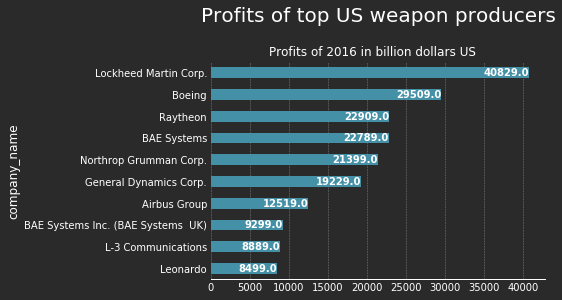

In [138]:
#Most weapon sold in 2016:

plt.rcParams.update({"figure.facecolor": "#2A2A2A",
              "axes.facecolor": "#2A2A2A",
              "axes.grid" : True,
              "axes.grid.axis" : "y",
              "grid.color"    : "grey",
              "grid.linewidth": 0.5,
              "axes.spines.left" : False,
              "axes.spines.right" : False,
              "axes.spines.top" : False,
              "ytick.major.size": 0,     
              "ytick.minor.size": 0,
              "xtick.direction" : "in",
              "xtick.major.size" : 7,
              "xtick.color"      : "#191919",
              "axes.edgecolor"    :"#191919",
              "axes.prop_cycle" : plt.cycler('color',
                                    ['#4490A7', '#43987D', '#AA64EA', '#DC4F7F',
                                     '#CD8342', '#81C885', '#3D9BB9', '#969696',
                                     '#fcae91', '#17becf']),
                    'pdf.fonttype': 42,
    'ps.fonttype': 42})

ax = df_producers.groupby('company_name')['arms_sales_2016'].sum().sort_values(ascending=True).tail(10).plot(kind='barh', color= '#4490A7')

#Getting rid of y-ax
ax.grid(False, axis='x')
ax.grid(linestyle='--')
ax.grid(linestyle='', axis='y')

#ticks
ax.tick_params(left=True)
ax.tick_params(bottom=False)

ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')


#Title
ax.set_title("Profits of top US weapon producers", pad=40, fontsize=20, color='white')
plt.gcf().text(0.5, 0.9, "Profits of 2016 in billion dollars US", ha="center", fontsize=12, color='white')

#Now numbers inside of bars
for i, bar in enumerate(ax.patches):
    print(i)
    print(bar)
    
    value = bar.get_width() -1
    x_pos = bar.get_width()
    y_pos = i
    ax.text(x_pos, y_pos, round(value,1), va='center', ha = "right", color="White", fontweight="bold")

#Save
plt.savefig('world_companies_armssold_2016_bars.pdf', transparent=False, bbox_inches='tight')
plt.savefig('world_companies_armssold_2016_bars.png', transparent=False, bbox_inches='tight')


In [219]:
#Most profit in 2016:
df_producers.groupby('company_name')['total_profit_2016'].sum().sort_values(ascending=False).head(10)

company_name
United Technologies Corp.             5436.0
Lockheed Martin Corp.                 5302.0
Boeing                                4895.0
Honeywell International               4809.0
Hewlett Packard Enterprise Company    3161.0
General Dynamics Corp.                2955.0
BAE Systems                           2351.0
Northrop Grumman Corp.                2200.0
Raytheon                              2174.0
Safran                                2111.0
Name: total_profit_2016, dtype: float64

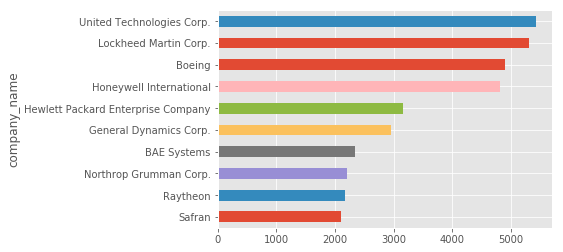

In [218]:
df_producers.groupby('company_name')['total_profit_2016'].sum().sort_values(ascending=True).tail(10).plot(kind='barh')

In [220]:
#Most employees: total_employment_2016
df_producers.groupby('company_name')['total_employment_2016'].sum().sort_values(ascending=False).head(10)

company_name
General Electric                      295000.0
Hewlett Packard Enterprise Company    195000.0
ThyssenKrupp                          156490.0
Boeing                                150500.0
Airbus Group                          133780.0
Almaz-Antey                           125000.0
NEC Corp.                             107730.0
General Dynamics Corp.                 98800.0
Lockheed Martin Corp.                  97000.0
United Shipbuilding Corp.              89650.0
Name: total_employment_2016, dtype: float64

## Let's focus only on the top 10 weapon producers of 2016 (top10_df) 

In [74]:
top10_df = df_producers.sort_values(["arms_sales_2016", "company_name"], ascending=False).head(10)
top10_df.head(10)

,rank_2016,rank_2015,company_name,country,arms_sales_2016,arms_sales_2015,total_sales_2016,arms_sales_percentage_of_total_2016,total_profit_2016,total_employment_2016
0,1,1.0,Lockheed Martin Corp.,United States,40830.0,36899.720895,47248.0,86.0,5302.0,97000.0
1,2,2.0,Boeing,United States,29510.0,28312.738645,94571.0,31.0,4895.0,150500.0
2,3,4.0,Raytheon,United States,22910.0,22054.772807,24069.0,95.0,2174.0,63000.0
3,4,3.0,BAE Systems,United Kingdom,22790.0,22689.449476,24008.0,95.0,2351.0,83000.0
4,5,5.0,Northrop Grumman Corp.,United States,21400.0,20313.073577,24508.0,87.0,2200.0,67000.0
5,6,6.0,General Dynamics Corp.,United States,19230.0,19482.728596,31353.0,61.0,2955.0,98800.0
6,7,7.0,Airbus Group,Trans-European,12520.0,12869.073250,73652.0,17.0,1101.0,133780.0
7,0,0.0,BAE Systems Inc. (BAE Systems UK),United States,9300.0,9417.327232,10000.0,93.0,0.0,29500.0
8,8,10.0,L-3 Communications,United States,8890.0,8880.640841,10511.0,85.0,647.0,38000.0
9,9,9.0,Leonardo,Italy,8500.0,9264.115832,13277.0,64.0,561.0,45630.0


In [75]:
#Most employees: total_employment_2016
top10_df.groupby('company_name')['total_employment_2016'].sum().sort_values(ascending=False).head(10)

company_name
Boeing                                150500.0
Airbus Group                          133780.0
General Dynamics Corp.                 98800.0
Lockheed Martin Corp.                  97000.0
BAE Systems                            83000.0
Northrop Grumman Corp.                 67000.0
Raytheon                               63000.0
Leonardo                               45630.0
L-3 Communications                     38000.0
BAE Systems Inc. (BAE Systems  UK)     29500.0
Name: total_employment_2016, dtype: float64

In [76]:
#Employees summed together: These are all voters in some voting districts
top10_df['total_employment_2016'].sum()

806210.0

In [77]:
#How much of the profit (in %) was made with weapon sales/how dependent is the company of the arms business?
top10_df.groupby('company_name')['arms_sales_percentage_of_total_2016'].sum().sort_values(ascending=False)

company_name
Raytheon                              95.0
BAE Systems                           95.0
BAE Systems Inc. (BAE Systems  UK)    93.0
Northrop Grumman Corp.                87.0
Lockheed Martin Corp.                 86.0
L-3 Communications                    85.0
Leonardo                              64.0
General Dynamics Corp.                61.0
Boeing                                31.0
Airbus Group                          17.0
Name: arms_sales_percentage_of_total_2016, dtype: float64

In [78]:
us_producers = top10_df[top10_df.country == 'United States']
us_producers

,rank_2016,rank_2015,company_name,country,arms_sales_2016,arms_sales_2015,total_sales_2016,arms_sales_percentage_of_total_2016,total_profit_2016,total_employment_2016
0,1,1.0,Lockheed Martin Corp.,United States,40830.0,36899.720895,47248.0,86.0,5302.0,97000.0
1,2,2.0,Boeing,United States,29510.0,28312.738645,94571.0,31.0,4895.0,150500.0
2,3,4.0,Raytheon,United States,22910.0,22054.772807,24069.0,95.0,2174.0,63000.0
4,5,5.0,Northrop Grumman Corp.,United States,21400.0,20313.073577,24508.0,87.0,2200.0,67000.0
5,6,6.0,General Dynamics Corp.,United States,19230.0,19482.728596,31353.0,61.0,2955.0,98800.0
7,0,0.0,BAE Systems Inc. (BAE Systems UK),United States,9300.0,9417.327232,10000.0,93.0,0.0,29500.0
8,8,10.0,L-3 Communications,United States,8890.0,8880.640841,10511.0,85.0,647.0,38000.0


In [79]:
#Numbers of employees:
us_producers.total_employment_2016.sum()

543800.0

In [80]:
#Profits:
us_producers.total_profit_2016.sum()

18173.0

0
Rectangle(xy=(0, -0.25), width=0, height=0.5, angle=0)
1
Rectangle(xy=(0, 0.75), width=647, height=0.5, angle=0)
2
Rectangle(xy=(0, 1.75), width=2174, height=0.5, angle=0)
3
Rectangle(xy=(0, 2.75), width=2200, height=0.5, angle=0)
4
Rectangle(xy=(0, 3.75), width=2955, height=0.5, angle=0)
5
Rectangle(xy=(0, 4.75), width=4895, height=0.5, angle=0)
6
Rectangle(xy=(0, 5.75), width=5302, height=0.5, angle=0)


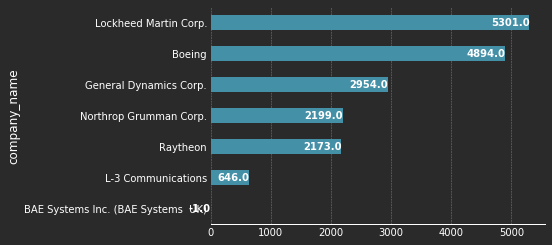

In [139]:
plt.rcParams.update({"figure.facecolor": "#2A2A2A",
              "axes.facecolor": "#2A2A2A",
              "axes.grid" : True,
              "axes.grid.axis" : "y",
              "grid.color"    : "grey",
              "grid.linewidth": 0.5,
              "axes.spines.left" : False,
              "axes.spines.right" : False,
              "axes.spines.top" : False,
              "ytick.major.size": 0,     
              "ytick.minor.size": 0,
              "xtick.direction" : "in",
              "xtick.major.size" : 7,
              "xtick.color"      : "#191919",
              "axes.edgecolor"    :"#191919",
              "axes.prop_cycle" : plt.cycler('color',
                                    ['#4490A7', '#43987D', '#AA64EA', '#DC4F7F',
                                     '#CD8342', '#81C885', '#3D9BB9', '#969696',
                                     '#fcae91', '#17becf']),
                    'pdf.fonttype': 42,
    'ps.fonttype': 42})

ax = us_producers.groupby('company_name')['total_profit_2016'].sum().sort_values(ascending=True).plot(kind='barh', color= '#4490A7')

#Getting rid of y-ax
ax.grid(False, axis='x')
ax.grid(linestyle='--')
ax.grid(linestyle='', axis='y')

#ticks
ax.tick_params(left=True)
ax.tick_params(bottom=False)

ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')



#Now numbers inside of bars
for i, bar in enumerate(ax.patches):
    print(i)
    print(bar)
    
    value = bar.get_width() -1
    x_pos = bar.get_width()
    y_pos = i
    ax.text(x_pos, y_pos, round(value,1), va='center', ha = "right", color="White", fontweight="bold")

#Save
plt.savefig('us_companies_profit_2016_bars.pdf', transparent=False, bbox_inches='tight')
plt.savefig('us_companies_profit_2016_bars.png', transparent=False, bbox_inches='tight')

In [145]:
us_producers.groupby('company_name')['total_sales_2016'].sum().sort_values(ascending=False)

company_name
Boeing                                94571.0
Lockheed Martin Corp.                 47248.0
General Dynamics Corp.                31353.0
Northrop Grumman Corp.                24508.0
Raytheon                              24069.0
L-3 Communications                    10511.0
BAE Systems Inc. (BAE Systems  UK)    10000.0
Name: total_sales_2016, dtype: float64

In [144]:
us_producers.groupby('company_name')['arms_sales_2016'].sum().sort_values(ascending=False)

company_name
Lockheed Martin Corp.                 40830.0
Boeing                                29510.0
Raytheon                              22910.0
Northrop Grumman Corp.                21400.0
General Dynamics Corp.                19230.0
BAE Systems Inc. (BAE Systems  UK)     9300.0
L-3 Communications                     8890.0
Name: arms_sales_2016, dtype: float64

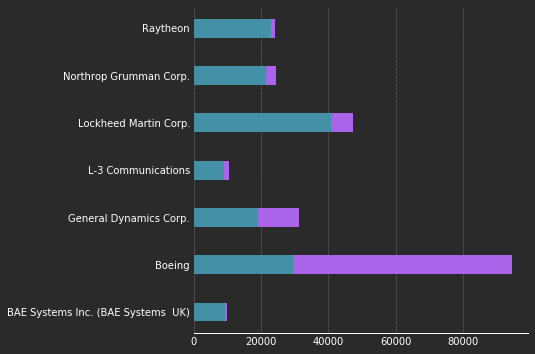

In [118]:
plt.rcParams.update({"figure.facecolor": "#2A2A2A",
              "axes.facecolor": "#2A2A2A",
              "axes.grid" : True,
              "axes.grid.axis" : "y",
              "grid.color"    : "grey",
              "grid.linewidth": 0.5,
              "axes.spines.left" : False,
              "axes.spines.right" : False,
              "axes.spines.top" : False,
              "ytick.major.size": 0,     
              "ytick.minor.size": 0,
              "xtick.direction" : "in",
              "xtick.major.size" : 7,
              "xtick.color"      : "#191919",
              "axes.edgecolor"    :"#191919",
              "axes.prop_cycle" : plt.cycler('color',
                                    ['#4490A7', '#43987D', '#AA64EA', '#DC4F7F',
                                     '#CD8342', '#81C885', '#3D9BB9', '#969696',
                                     '#fcae91', '#17becf']),
                    'pdf.fonttype': 42,
    'ps.fonttype': 42})

ax=us_producers.groupby('company_name')['total_sales_2016'].sum().plot(y='company_name', x='total_sales_2016', kind="barh", width=0.4,stacked=True, figsize=(6,6), color='#AA64EA')
us_producers.groupby('company_name')['arms_sales_2016'].sum().plot(y='company_name', x='total_sales_2016', kind="barh", width=0.4, ax=ax, color='#4490A7')

#Getting rid of y-ax
ax.grid(False, axis='x')
ax.grid(linestyle='--')
ax.grid(linestyle='', axis='y')

#ticks
ax.tick_params(left=True)
ax.tick_params(bottom=False)

ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

#ax.grid(True, axis='x')
#ax.grid(False, axis='y')


ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

#Save
plt.savefig('us_companies_profits_2016_stackedbars.pdf', transparent=False, bbox_inches='tight')
plt.savefig('us_companies_profits_2016_stackedbars.png', transparent=False, bbox_inches='tight')

### Arms sales percentage 

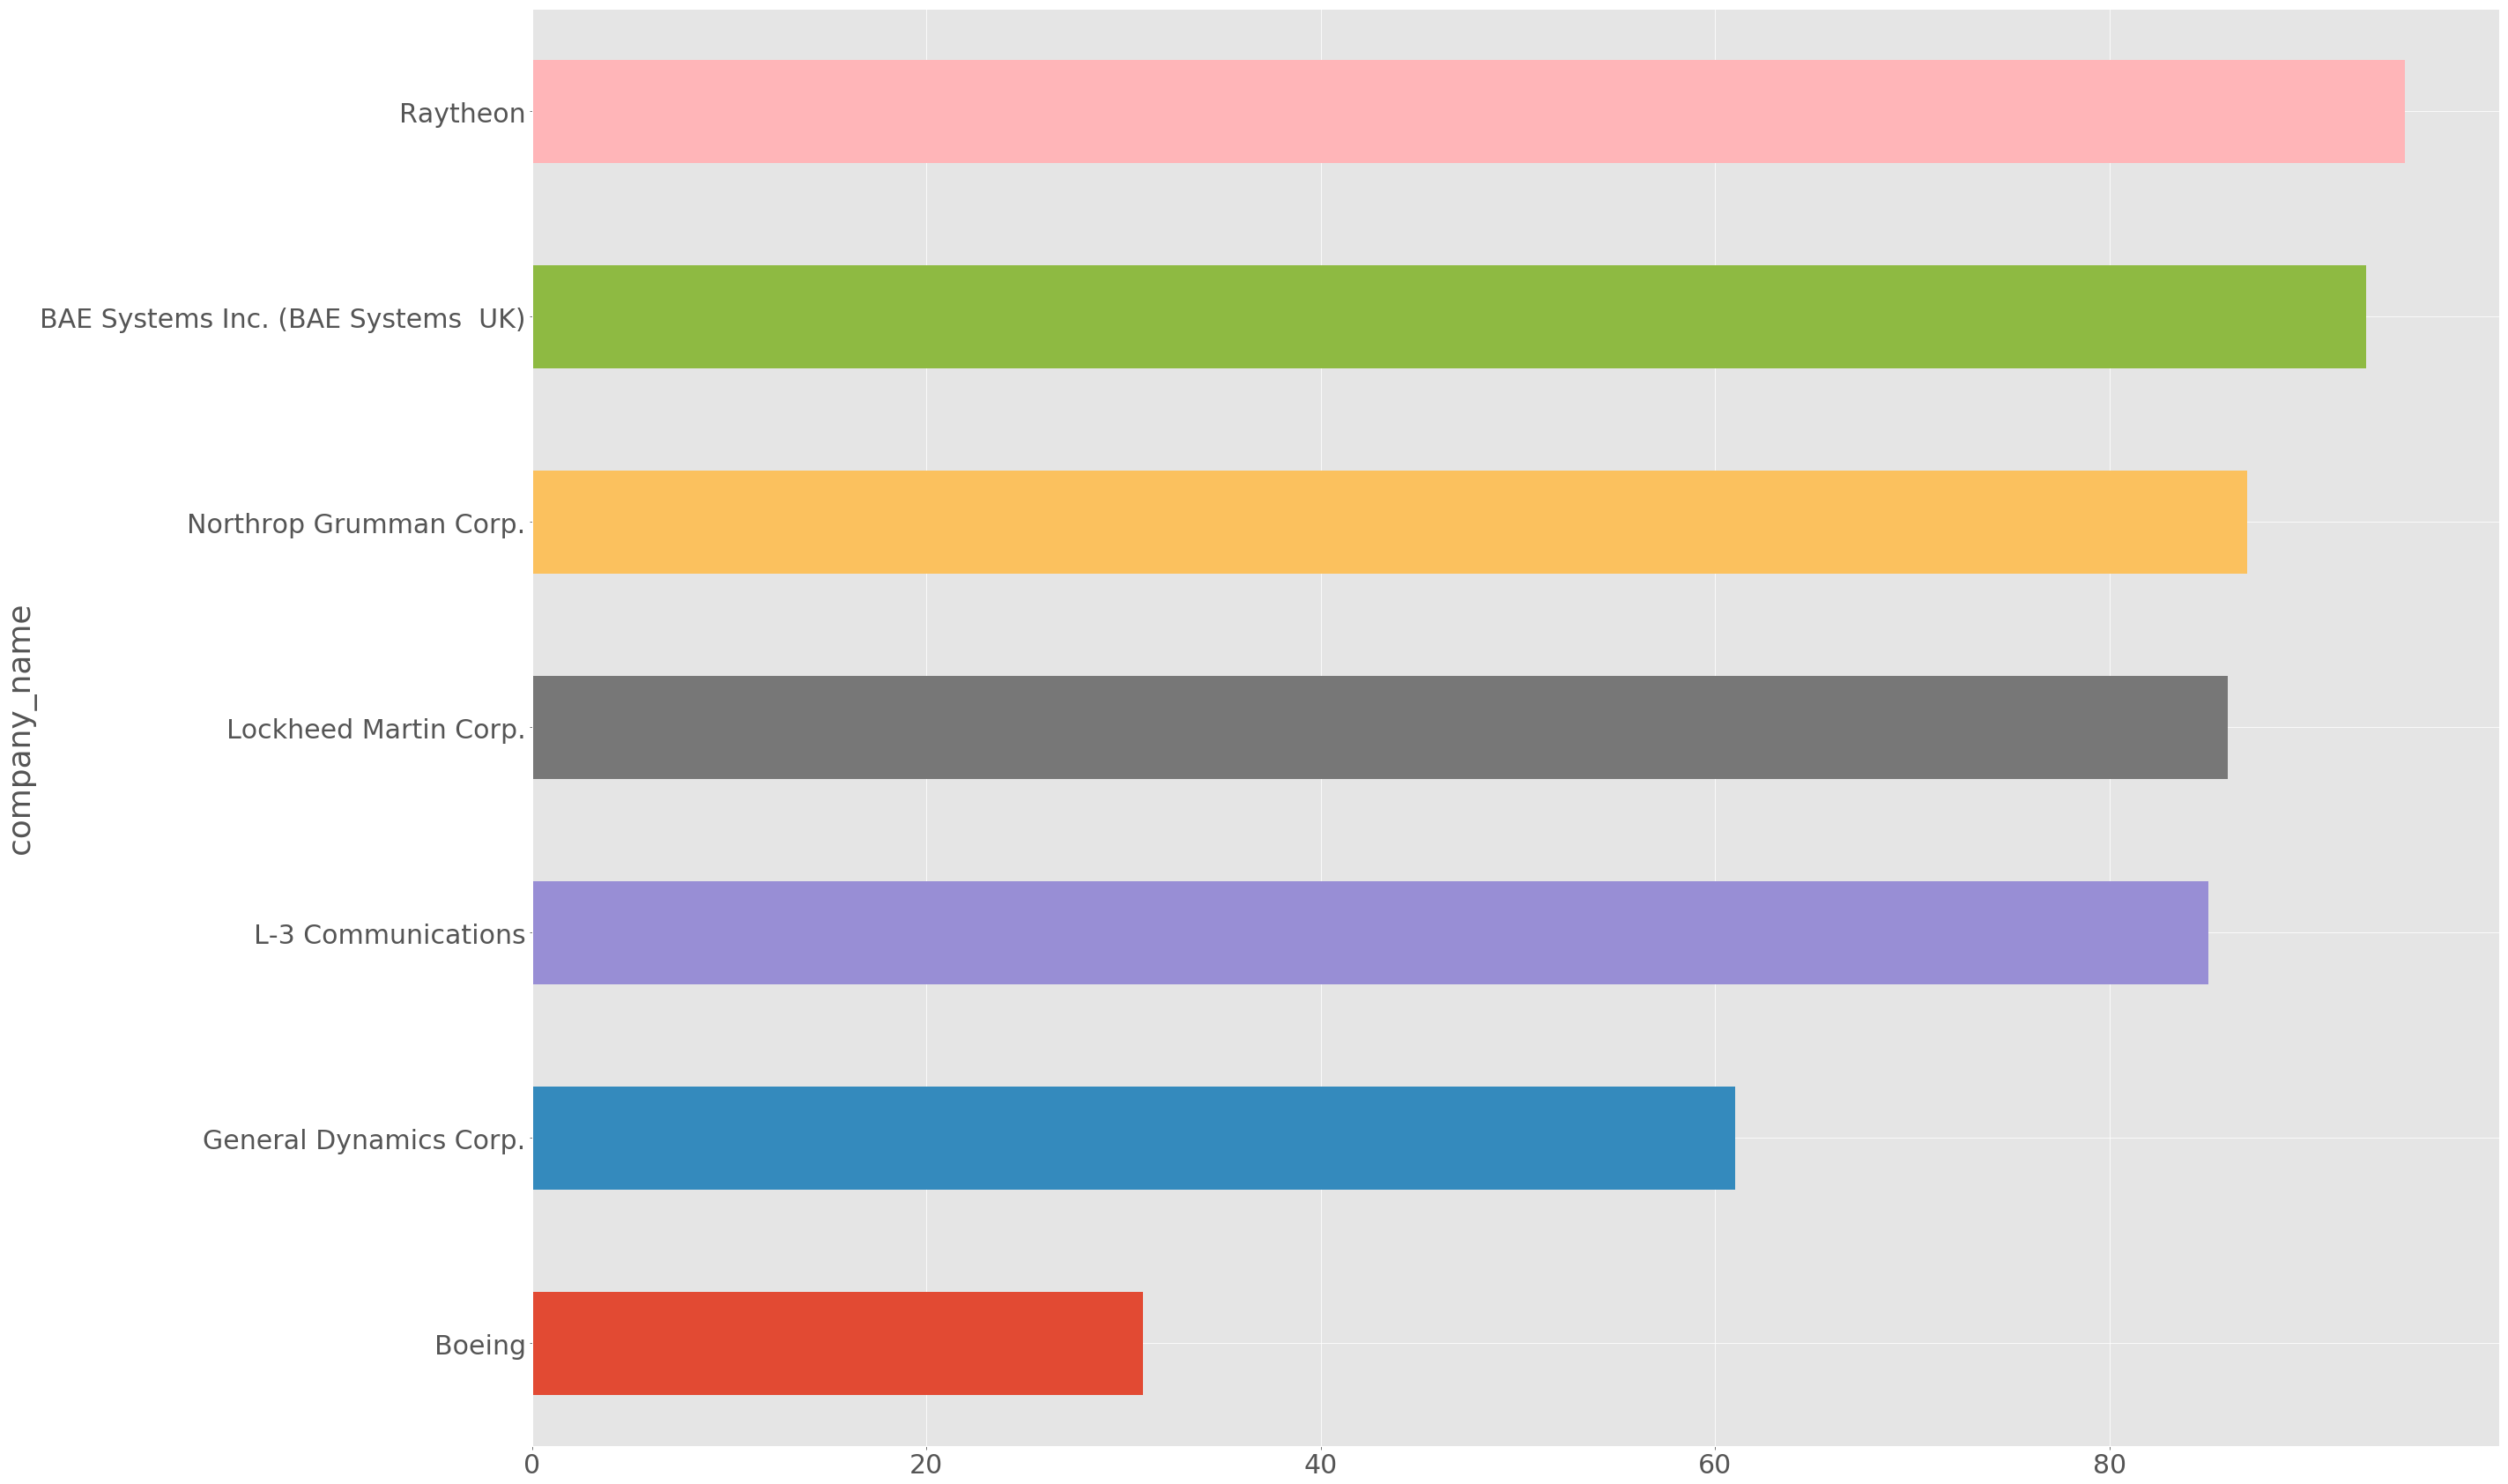

In [329]:
ax = us_producers.groupby('company_name')['arms_sales_percentage_of_total_2016'].sum().sort_values(ascending=True).plot(kind='barh')

In [353]:
us_producers.head(10)

,rank_2016,rank_2015,company_name,country,arms_sales_2016,arms_sales_2015,total_sales_2016,arms_sales_percentage_of_total_2016,total_profit_2016,total_employment_2016
0,1,1.0,Lockheed Martin Corp.,United States,40830.0,36899.720895,47248.0,86.0,5302.0,97000.0
1,2,2.0,Boeing,United States,29510.0,28312.738645,94571.0,31.0,4895.0,150500.0
2,3,4.0,Raytheon,United States,22910.0,22054.772807,24069.0,95.0,2174.0,63000.0
4,5,5.0,Northrop Grumman Corp.,United States,21400.0,20313.073577,24508.0,87.0,2200.0,67000.0
5,6,6.0,General Dynamics Corp.,United States,19230.0,19482.728596,31353.0,61.0,2955.0,98800.0
7,0,0.0,BAE Systems Inc. (BAE Systems UK),United States,9300.0,9417.327232,10000.0,93.0,0.0,29500.0
8,8,10.0,L-3 Communications,United States,8890.0,8880.640841,10511.0,85.0,647.0,38000.0


### Waffle chart employees 

/Users/benbitoun/.pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


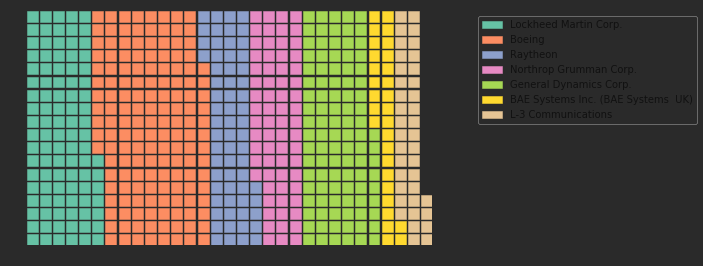

In [358]:
plt.rcParams.update({"figure.facecolor": "#2A2A2A",
              "axes.facecolor": "#2A2A2A",
              "axes.grid" : True,
              "axes.grid.axis" : "y",
              "grid.color"    : "grey",
              "grid.linewidth": 0.5,
              "axes.spines.left" : False,
              "axes.spines.right" : False,
              "axes.spines.top" : False,
              "ytick.major.size": 0,     
              "ytick.minor.size": 0,
              "xtick.direction" : "in",
              "xtick.major.size" : 7,
              "xtick.color"      : "#191919",
              "axes.edgecolor"    :"#191919",
              "axes.prop_cycle" : plt.cycler('color',
                                    ['#4490A7', '#43987D', '#AA64EA', '#DC4F7F',
                                     '#CD8342', '#81C885', '#3D9BB9', '#969696',
                                     '#fcae91', '#17becf']),
                    'pdf.fonttype': 42,
    'ps.fonttype': 42})

fig = plt.figure(
    FigureClass=Waffle, 
    rows=18,
    values=us_producers.total_employment_2016 / 1000,
    labels=list(us_producers.company_name),
    figsize=(10, 5),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)

In [ ]:
companies = ['Raytheon', 'BAE Systems Inc.', 'Northrop Grumman Corp.', 'Lockheed Martin Corp.', 'L-3 Communications', 'General Dynamics Corp.', 'Boeing']
bronzes = np.array([38, 17, 26, 19, 15])
silvers = np.array([37, 23, 18, 18, 10])
golds = np.array([46, 27, 26, 19, 17])
ind = [x for x, _ in enumerate(countries)]

plt.bar(ind, golds, width=0.8, label='golds', color='gold', bottom=silvers+bronzes)
plt.bar(ind, silvers, width=0.8, label='silvers', color='silver', bottom=bronzes)
plt.bar(ind, bronzes, width=0.8, label='bronzes', color='#CD853F')

plt.xticks(ind, countries)
plt.ylabel("Medals")
plt.xlabel("Countries")
plt.legend(loc="upper right")
plt.title("2012 Olympics Top Scorers")

plt.show()

# Census Df 

In [231]:
population_df = pd.read_csv('city_populations.csv')
population_df.head()

,GEO.id,GEO.id2,GEO.display-label,GC_RANK.target-geo-id,GC_RANK.target-geo-id2,GC_RANK.rank-label,GC_RANK.display-label,GC_RANK.display-label.1,respop72016,respop72017,numdiff20162017,percdiff20162017
0,0100000US,NaN,United States,1620000US4827684,4827684,1,"United States - Frisco city, Texas","Frisco city, Texas",163816,177286,13470,8.2
1,0100000US,NaN,United States,1620000US4850820,4850820,2,"United States - New Braunfels city, Texas","New Braunfels city, Texas",73319,79152,5833,8.0
2,0100000US,NaN,United States,1620000US4857176,4857176,3,"United States - Pflugerville city, Texas","Pflugerville city, Texas",59507,63359,3852,6.5
3,0100000US,NaN,United States,1620000US1902305,1902305,4,"United States - Ankeny city, Iowa","Ankeny city, Iowa",58639,62416,3777,6.4
4,0100000US,NaN,United States,1620000US0407940,407940,5,"United States - Buckeye city, Arizona","Buckeye city, Arizona",64639,68453,3814,5.9


## Cleaning df 

In [240]:
#dropping unwanted columns:
#population_df.drop(['GEO.id', 'GEO.id2', 'GC_RANK.target-geo-id', 'GC_RANK.target-geo-id2'], axis=1, inplace=True)

In [242]:
population_df.drop(['GEO.display-label', 'GC_RANK.display-label'], axis=1, inplace=True)

In [243]:
population_df.head()

,GC_RANK.rank-label,GC_RANK.display-label.1,respop72016,respop72017,numdiff20162017,percdiff20162017
0,1,"Frisco city, Texas",163816,177286,13470,8.2
1,2,"New Braunfels city, Texas",73319,79152,5833,8.0
2,3,"Pflugerville city, Texas",59507,63359,3852,6.5
3,4,"Ankeny city, Iowa",58639,62416,3777,6.4
4,5,"Buckeye city, Arizona",64639,68453,3814,5.9


In [244]:
#renaming columns:
population_df.rename(columns={'GC_RANK.rank-label':'rank',
                          'GC_RANK.display-label.1':'city_name',
                          'respop72016':'population_2016',
                            'respop72017':'population_2017',
                            'numdiff20162017':'change',
                            'percdiff20162017':'change_in_percent'}, inplace=True)
population_df.head()

,rank,city_name,population_2016,population_2017,change,change_in_percent
0,1,"Frisco city, Texas",163816,177286,13470,8.2
1,2,"New Braunfels city, Texas",73319,79152,5833,8.0
2,3,"Pflugerville city, Texas",59507,63359,3852,6.5
3,4,"Ankeny city, Iowa",58639,62416,3777,6.4
4,5,"Buckeye city, Arizona",64639,68453,3814,5.9


In [263]:
#Getting rid of the city:
population_df.city_name.str.replace('city' ',','')

0                            Frisco  Texas
1                     New Braunfels  Texas
2                      Pflugerville  Texas
3                             Ankeny  Iowa
4                         Buckeye  Arizona
5                        Georgetown  Texas
6               Castle Rock town, Colorado
7                      Franklin  Tennessee
8                          McKinney  Texas
9                          Meridian  Idaho
10                Flower Mound town, Texas
11                            Bend  Oregon
12                       Cedar Park  Texas
13                          Doral  Florida
14                     Fort Myers  Florida
15                      Irvine  California
16                      Gilroy  California
17                        Mansfield  Texas
18                 Murfreesboro  Tennessee
19               Lake Elsinore  California
20                       Henderson  Nevada
21                        Grapevine  Texas
22                         Edinburg  Texas
23         

In [258]:
#Creating column with states:
population_df['state'] = population_df.city_name.str.extract(", (.*)")
population_df.head()

,rank,city_name,population_2016,population_2017,change,change_in_percent,state
0,1,"Frisco city, Texas",163816,177286,13470,8.2,Texas
1,2,"New Braunfels city, Texas",73319,79152,5833,8.0,Texas
2,3,"Pflugerville city, Texas",59507,63359,3852,6.5,Texas
3,4,"Ankeny city, Iowa",58639,62416,3777,6.4,Iowa
4,5,"Buckeye city, Arizona",64639,68453,3814,5.9,Arizona


In [265]:
#Getting rid of the states in the city column:
population_df['city_name'] = population_df.city_name.str.replace(", (.*)", "")
population_df.head()

,rank,city_name,population_2016,population_2017,change,change_in_percent,state
0,1,Frisco city,163816,177286,13470,8.2,Texas
1,2,New Braunfels city,73319,79152,5833,8.0,Texas
2,3,Pflugerville city,59507,63359,3852,6.5,Texas
3,4,Ankeny city,58639,62416,3777,6.4,Iowa
4,5,Buckeye city,64639,68453,3814,5.9,Arizona


In [269]:
#Getting rid of the city in the city_name:
population_df['city_name'] = population_df.city_name.str.replace('city','')
population_df.head()

,rank,city_name,population_2016,population_2017,change,change_in_percent,state
0,1,Frisco,163816,177286,13470,8.2,Texas
1,2,New Braunfels,73319,79152,5833,8.0,Texas
2,3,Pflugerville,59507,63359,3852,6.5,Texas
3,4,Ankeny,58639,62416,3777,6.4,Iowa
4,5,Buckeye,64639,68453,3814,5.9,Arizona


## Looking for the cities where the US arms companies are located 

In [275]:
top10_df.groupby('company_name')['total_employment_2016'].sum().sort_values(ascending=False).head(10)

company_name
Boeing                                150500.0
Airbus Group                          133780.0
General Dynamics Corp.                 98800.0
Lockheed Martin Corp.                  97000.0
BAE Systems                            83000.0
Northrop Grumman Corp.                 67000.0
Raytheon                               63000.0
Leonardo                               45630.0
L-3 Communications                     38000.0
BAE Systems Inc. (BAE Systems  UK)     29500.0
Name: total_employment_2016, dtype: float64

In [273]:
#1.) Boeing = St. Louis, Missouri. Attention: Boeing is not Boeing Defense, Space and Security. The latter has 68'000 empl.
population_df[population_df.city_name.str.contains('.*St. Louis', na=False)]

,rank,city_name,population_2016,population_2017,change,change_in_percent,state
756,757,St. Louis,313144,308626,-4518,-1.4,Missouri


In [278]:
#2.) General Dynamics Corp. West Falls Church, Fairfax County

population_df[population_df.city_name.str.contains('.*Falls', na=False)]

,rank,city_name,population_2016,population_2017,change,change_in_percent,state
91,92,Sioux Falls,173322,176888,3566,2.1,South Dakota
124,125,Idaho Falls,60005,61076,1071,1.8,Idaho
392,393,Wichita Falls,104211,104747,536,0.5,Texas
556,557,Great Falls,58845,58876,31,0.1,Montana


In [279]:
#3. Raytheon. Waltham, Massachusetts
population_df[population_df.city_name.str.contains('.*Waltham', na=False)]

,rank,city_name,population_2016,population_2017,change,change_in_percent,state
748,749,Waltham,63052,62442,-610,-1.0,Massachusetts


In [ ]:
#4.) Northrop Grumman Corp. West Falls Church, Fairfax County

In [280]:
#5.) Lockheed Martin Corp. Bethesda (Maryland) Montgomery County
population_df[population_df.city_name.str.contains('.*Bethesda', na=False)]

,rank,city_name,population_2016,population_2017,change,change_in_percent,state


In [ ]:
#6.) L-3 Communications, New York

In [193]:
df_conflicts = pd.read_csv('bodycount_cleaned.csv')
df_conflicts.head()

,conflict_id,year,location_inc,side_a,side_a_2nd,side_b,side_b_2nd,territory_name,bdbest,type_of_conflict,battle_location,region
0,205,2016,Iran,Government of Iran,NaN,KDPI,NaN,Kurdistan,30,3,"Iran, Iraq",2
1,205,1993,Iran,Government of Iran,NaN,KDPI,NaN,Kurdistan,110,3,"Iran, Iraq",2
2,205,1996,Iran,Government of Iran,NaN,KDPI,NaN,Kurdistan,27,3,"Iran, Iraq",2
3,205,1990,Iran,Government of Iran,NaN,KDPI,NaN,Kurdistan,31,3,Iran,2
4,209,1989,Philippines,Government of Philippines,NaN,"CPP, Military faction (forces of Honasan, Aben...",NaN,NaN,822,3,Philippines,3


In [172]:
df_conflicts.dtypes

conflict_id          int64
year                 int64
location_inc        object
side_a              object
side_a_2nd          object
side_b              object
side_b_2nd          object
territory_name      object
bdbest               int64
type_of_conflict    object
battle_location     object
region              object
dtype: object

In [194]:
df_2017 = df_conflicts[df_conflicts.year == 2017]
df_2017

,conflict_id,year,location_inc,side_a,side_a_2nd,side_b,side_b_2nd,territory_name,bdbest,type_of_conflict,battle_location,region
30,209,2017,Philippines,Government of Philippines,NaN,CPP,NaN,NaN,174,3,Philippines,3
32,218,2017,"India, Pakistan",Government of India,NaN,Government of Pakistan,NaN,Kashmir,118,2,"India, Pakistan",3
74,223,2017,Myanmar (Burma),Government of Myanmar (Burma),NaN,ARSA,NaN,Arakan,393,3,Myanmar (Burma),3
104,227,2017,India,Government of India,NaN,CPI-Maoist,NaN,NaN,241,3,India,3
106,230,2017,Yemen (North Yemen),Government of Yemen (North Yemen),NaN,Forces of Hadi,"Government of Egypt, Government of Jordan, Gov...",NaN,2317,4,"Saudi Arabia, Yemen (North Yemen)",2
115,231,2017,Myanmar (Burma),Government of Myanmar (Burma),NaN,KIO,NaN,Kachin,28,3,Myanmar (Burma),3
165,259,2017,Iraq,Government of Iraq,"Government of Australia, Government of Belgium...",IS,NaN,NaN,13817,4,"Afghanistan, France, Iraq, Pakistan, Syria, Ye...",2
234,283,2017,DR Congo (Zaire),Government of DR Congo (Zaire),NaN,"CMC, CNPSC (Yakutumba), Kamuina Nsapu, M23, MNR",NaN,NaN,1608,3,DR Congo (Zaire),4
330,297,2017,Nigeria,Government of Nigeria,Government of Cameroon,Jama'atu Ahlis Sunna Lidda'awati wal-Jihad,NaN,NaN,1062,4,Nigeria,4
338,299,2017,Syria,Government of Syria,"Government of Iran, Government of Russia (Sovi...",Syrian insurgents,NaN,NaN,9433,4,"Lebanon, Syria",2


## Analysis 

In [191]:
df_2017.bdbest.describe()

count       49.000000
mean      1407.530612
std       3502.826508
min         25.000000
25%         60.000000
50%        174.000000
75%        594.000000
max      16129.000000
Name: bdbest, dtype: float64

In [195]:
#How many armed conflicts in 2017?
len(df_2017)

49

In [196]:
#How many deaths combatants?
df_2017['bdbest'].sum()

68969

In [197]:
#Bloodiest war zones:
df_2017.groupby('location_inc')['bdbest'].sum().sort_values(ascending=False).head(20)

location_inc
Syria                  20429
Afghanistan            18904
Iraq                   13817
Yemen (North Yemen)     2317
Nigeria                 1879
Somalia                 1837
DR Congo (Zaire)        1698
Philippines             1621
Turkey                  1297
India                    601
Pakistan                 588
Myanmar (Burma)          500
Egypt                    497
South Sudan              465
Ukraine                  409
Libya                    404
Mali                     345
Uganda                   235
Niger                    203
Sudan                    128
Name: bdbest, dtype: int64

In [285]:
industry_df.columns

Index(['Line', 'Unnamed: 1', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

In [289]:
industry_df.dtypes

Line            int64
Unnamed: 1     object
2008          float64
2009          float64
2010          float64
2011          float64
2012          float64
2013          float64
2014          float64
2015          float64
2016          float64
2017           object
dtype: object

In [32]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

In [49]:
text = ("United States Saudi Arabia 314 M-1A2S Tank 2009 2012-2017 314 Saudi M-1A1 rebuilt to M-1A2S 670 6V-53 Diesel engine 2011 2013-2017 670 6V-53T for 670 M-113A300 M-113A4 APC from Turkey 193 AAQ-13 LANTIRN Combat ac radar 2011 2016-2017 52 For F-15SA combat aircraft 600 AGM-88 HARM ARM 2011 AGM-88B 300 AIM-9X Sidewinder SRAAM 2011 2012-2017 220 AIM-9X Block-2 84 F-15SG FGA aircraft 2011 2016-2017 28 Part of $29 b deal F-15SA delivery 2016-2019 70 F-15SG FGA aircraft 2011 2016 2 Part of $29 b deal Saudi F-15S rebuilt to F-15SA 21 Patriot PAC-3 SAM/ABM system 2011 2014-2017 21 $1.7 b deal Saudi Patriot SAM systems rebuilt to Patriot-3 158 AAQ-33 Sniper Aircraft EO system 2012 2016-2017 52 For F-15SA combat aircraft 25 F110 Turbofan 2012 2017 10 Spare engines for F-15SA combat aircraft 400 RGM-84L Harpoon-2 Anti-ship MI/SSM 2012 2016-2017 120 AGM-84L 650 AGM-84H SLAM-ER ASM 2013 2016-2017 110 For F-15SA combat aircraft 500 AIM-120C AMRAAM BVRAAM 2013 2015-2017 355 AIM-120C-7 1000 GBU-39 SDB Guided bomb 2013 2017 200  355 AGM-154 JSOW Guided bomb 2014 2016-2017 220 $122 m deal JSOW-C Block-3 24 AH-6S Combat helicopter 2014 2016-2017 24 $235 m deal AH-6i version for National Guard 4941 BGM-71F TOW-2B Anti-tank missile 2014 2015-2017 4941 Incl 4194 for National Guard 10747 BGM-71 TOW Anti-tank missile 2014 2015-2017 10747 BGM-71 TOW-2A and TOW-2A-RF versions incl 9740 for National Guard 60 VT-400 Diesel engine 2014 2015-2017 60 For 60 LM-13 APC from South Africa 20 C-130J-30 Hercules Transport aircraft 2015  1325 M-ATV APV 2015 2016-2017 1325 Recipient possibly other Middle Eastern country 10 MH-60R Seahawk ASW helicopter 2015 Delivery planned 2018-2019 320 MIM-104F PAC-3 ABM 2015 2017 80 For modernized Patriot SAM systems Patriot PAC-3 SAM/ABM system 2015 2017 1 $2 b deal 8120 Paveway Guided bomb 2015 2016-2017 8120  5200 JDAM Guided bomb 2016 2016-2017 5200 Incl GBU-31, GBU-38, GBU-54 LJDAM and GBU56 LJDAM versions 2 King Air-350 ISR AGS aircraft 2016 $71 m deal: delivery by 2020 153 M-1A2S Tank 2016  20 M-88A2 HERCULES ARV 2016  8 S-70/UH-60L Helicopter 2016 Delivery 2017 618 AGM-154 JSOW Guided bomb 2017 $302 m deal JSOW-C Block-3 version 24 AH-64E Apache Guardian Combat helicopter 2017 Delivery planned by 2022 48 CH-47F Chinook Transport helicopter 2017  F110 Turbofan 2017 Spare engines for F-15SA combat aircraft 4 MMSC Frigate 2017  6 P-8A Poseidon ASW aircraft 2017 Selected but not yet ordered by end-2017 100 RIM-116A RAM SAM 2017 For SeaRam SAM system on MMSC frigates RIM-162 ESSM SAM 2017 For MMSC frigates 40 S-70/UH-60L Helicopter 2017 UH-60M version 30 S-70/UH-60L Helicopter 2017  10 Some sensor Something 2017 74K Persistent Threat Detection System PTDS Aerostats 7 THAAD ABM system 2017 Selected but not yet ordered by end-2017")

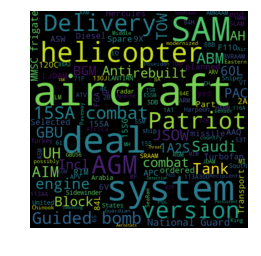

In [51]:
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.show()


#Save
plt.savefig('worldcloud.pdf', transparent=False, bbox_inches='tight')
plt.savefig('worldcloud.png', transparent=False, bbox_inches='tight')

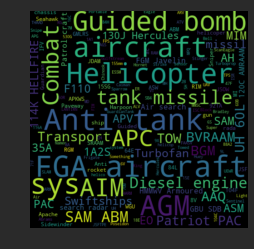

In [143]:
plt.rcParams.update({"figure.facecolor": "#2A2A2A",
              "axes.facecolor": "#2A2A2A",
              "axes.grid" : True,
              "axes.grid.axis" : "y",
              "grid.color"    : "grey",
              "grid.linewidth": 0.5,
              "axes.spines.left" : False,
              "axes.spines.right" : False,
              "axes.spines.top" : False,
              "ytick.major.size": 0,     
              "ytick.minor.size": 0,
              "xtick.direction" : "in",
              "xtick.major.size" : 7,
              "xtick.color"      : "#191919",
              "axes.edgecolor"    :"#191919",
              "axes.prop_cycle" : plt.cycler('color',
                                    ['#4490A7', '#43987D', '#AA64EA', '#DC4F7F',
                                     '#CD8342', '#81C885', '#3D9BB9', '#969696',
                                     '#fcae91', '#17becf']),
         'pdf.fonttype': 42,
    'ps.fonttype': 42})

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.show()


#Save
plt.savefig('worldcloud_new.pdf', transparent=False, bbox_inches='tight')
plt.savefig('worldcloud_new.png', transparent=False, bbox_inches='tight')

In [141]:
text2 =('M-1A1 Abrams Swiftships-93 Swiftships-93 F-35A JSF Namer F-35A JSF F-35A JSFTPE-331 AGM-114K HELLFIRE C-130J Hercules RGM-84L Harpoon-2 Swiftships-93 MPQ-64 Sentinel AIM-7M Sparrow AIM-9L Sidewinder F-16C Block-50/52 Paveway AGM-114K HELLFIRE HMMWV Up-Armoured HMMWV Up-Armoured WGU-59 APKWS M-198 155mm HMMWV Up-Armoured GBU-39 SDB C-130J Hercules M-270 chassis 8V-92TA GBU-39 SDB APG-82 GMLRS 8V-92TA Gulfstream-5 S-70B/SH-60B Seahawk Caiman SB4 RG-33 JDAM BGM-71 TOW GMLRS M-113 S-70/UH-60L TPS-77 FGM-148 Javelin Patriot PAC-3 AAQ-33 Snipe AAQ-33 Sniper F/A-18E Super Hornet M-1A2S Bell-205/UH-1 Huey-2 BGM-71 TOW M-2 Bradley M-992 FAASV WGU-59 APKWS MD-530G ScanEagle AIM-120C AMRAAM AGM-114K HELLFIRE AH-64E Apache Guardian FGM-148 Javelin MIM-104C PAC-2 MIM-104F PAC-3 Patriot PAC-3 FIM-92 Stinger ISC AIM-120C AMRAAM F110 F-15E Strike Eagle FGM-148 Javelin FPS-132 UEWR M-1A2S 6V-53 AAQ-13 LANTIRN AGM-88 HARM AIM-9X Sidewinder F-15SG F-15SG Patriot PAC-3 AAQ-33 Sniper F110 RGM-84L Harpoon-2 AGM-84H SLAM-ER AIM-120C AMRAAM GBU-39 SDB AGM-154 JSOW AH-6S BGM-71F TOW-2B BGM-71 TOW VT-400 C-130J-30 Hercules M-ATV MH-60R Seahawk MIM-104F PAC-3 Patriot PAC-3 Paveway JDAM King Air-350 ISR M-1A2S M-88A2 HERCULES S-70/UH-60L AGM-154 JSOW AH-64E Apache Guardian CH-47F Chinook F110 MMSC P-8A Poseidon RIM-116A RAM RIM-162 ESSM S-70/UH-60L S-70/UH-60L Some sensor THAAD GuardianTank Patrol craft Patrol craft FGA aircraft APC/IFV FGA aircraft FGA aircraft Turboprop Anti-tank missile Transport aircraft Anti-ship MI/S Patrol craft Air search radar BVRAAM SRAAM FGA aircraft Guided bomb Anti-tank missile APV APV ASM Towed gun APV Guided bomb Transport aircraft Gun chassis Diesel engine Guided bomb Combat ac rada Guided rocket Diesel engine Light transport  ASW helicopter APC Diesel engine APC Guided bomb Anti-tank missil Guided rocket APC Helicopter Air search radar Anti-tank missil SAM/ABM sys Aircraft EO sys Aircraft EO sys FGA aircraft Tank Helicopter Anti-tank missile IFV ALV ASM Combat helicoper UAV BVRAAM Anti-tank missile Combat helicoper Anti-tank missile SAM ABM SAM/ABM sys Portable SAM Diesel engine BVRAAM Turbofan FGA aircraft Anti-tank missil Air search radar Tank Diesel engine Combat ac rada ARM SRAAM FGA aircraft FGA aircraft SAM/ABM sys Aircraft EO sys Turbofan Anti-ship MI/S ASM BVRAAM helicopter ABM SAM/ABM sys Guided bomb Guided bomb AGS aircraft Tank ARV Helicopter Guided bomb Combat helicop Transport helico Turbofan Frigate ASW aircraft SAM SAM Helicopter Helicopter Something ABM system APC')

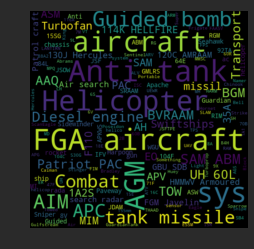

In [142]:
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text2)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.show()


#Save
plt.savefig('worldcloud_middleeast.pdf', transparent=False, bbox_inches='tight')
plt.savefig('worldcloud_middleeast.png', transparent=False, bbox_inches='tight')

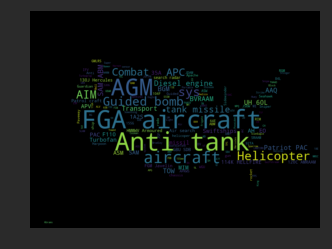

In [163]:
usa_mask = np.array(Image.open("usa.jpg"))
 
# Make the figure
wordcloud = WordCloud(mask=usa_mask).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [165]:
text_usexports = pd.read_csv('weapons.csv')
text_usexports.head()

,FGA aircraft
0,ASW aircraft
1,FGA aircraft
2,APC/IFV
3,FGA aircraft
4,FGA aircraft


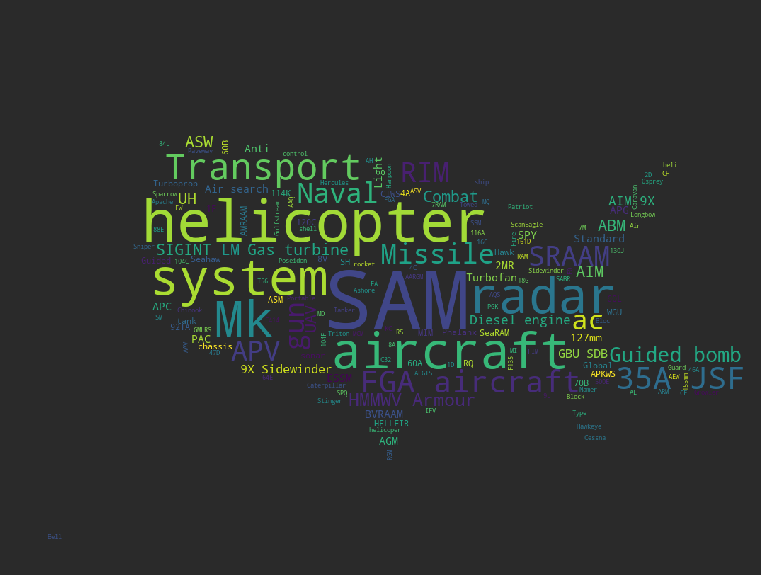

In [187]:
usa_mask = np.array(Image.open("usa.jpg"))

wordcloud2  = WordCloud(mask=usa_mask, width=1000, height=500, background_color="#2a2a2a").generate(' '.join(text_usexports['FGA aircraft']))
# Generate plot


plt.figure( figsize=(20,10) )
plt.imshow(wordcloud2)

plt.axis("off")

#Save
plt.savefig('worldcloud_usexports.pdf', transparent=False, bbox_inches='tight')
plt.savefig('worldcloud_usexports.png', transparent=False, bbox_inches='tight')

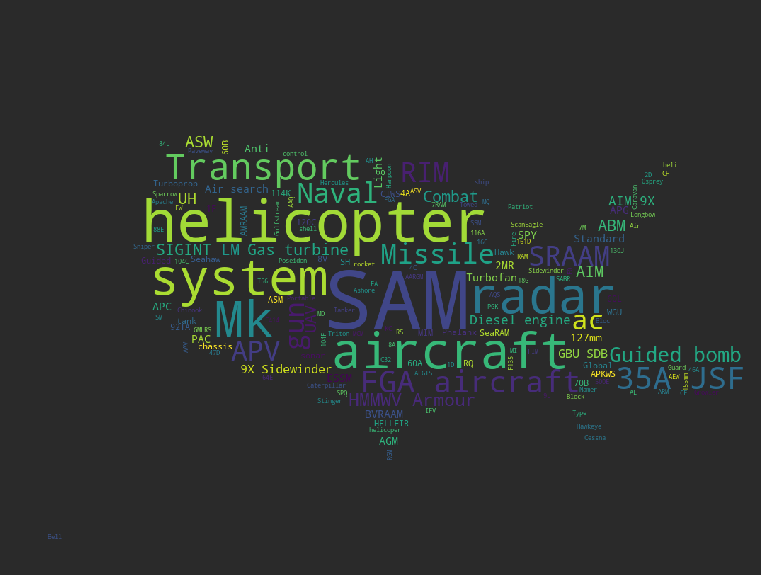

In [189]:
usa_mask = np.array(Image.open("usmap.jpg"))

wordcloud3  = WordCloud(mask=usa_mask, width=1000, height=500, background_color="#2a2a2a").generate(' '.join(text_usexports['FGA aircraft']))
# Generate plot


plt.figure( figsize=(20,10) )
plt.imshow(wordcloud2)

plt.axis("off")

#Save
plt.savefig('worldcloud_usexports1.pdf', transparent=False, bbox_inches='tight')
plt.savefig('worldcloud_usexports1.png', transparent=False, bbox_inches='tight')

## DF für wafflecharts exporters 

In [6]:
exporters_df = pd.read_csv('TIV-Export-All-2016-2017.csv', error_bad_lines=False)
exporters_df.head()

b'Skipping line 59: expected 4 fields, saw 5\n'


,country,2016,2017,Total
0,Algeria,0.0,NaN,0
1,Australia,134.0,97.0,231
2,Austria,15.0,22.0,37
3,Belarus,152.0,23.0,174
4,Belgium,7.0,12.0,19


In [15]:
#Getting rid of NaN:
exporters_df = exporters_df.fillna(0)
exporters_df.tail()

,country,2016,2017,Total
52,United Kingdom,1365.0,1214.0,2579
53,United States,10304.0,12394.0,22698
54,Unknown supplier(s),21.0,7.0,28
55,Uzbekistan,68.0,0.0,68
56,Total,32262.0,31106.0,63368


In [19]:
#Dropping total column. TOTAL: 32262
exporters_df = exporters_df.drop(exporters_df.index[56])

In [370]:
exporters_df.dtypes

country     object
2016       float64
2017       float64
Total        int64
dtype: object

In [201]:
exporters_df['2016'].sum()

32263.0

In [17]:
exporters_df.shape

(57, 4)

In [20]:
exporters_df.groupby('country')['2016'].sum().sort_values(ascending=False).head(23)

country
United States     10304.0
Russia             6937.0
Germany (FRG)      2535.0
France             2278.0
China              2192.0
Israel             1433.0
United Kingdom     1365.0
Italy               670.0
South Korea         585.0
Ukraine             535.0
Spain               507.0
Netherlands         471.0
Turkey              311.0
Sweden              267.0
Switzerland         186.0
Portugal            172.0
Belarus             152.0
Norway              150.0
Canada              144.0
Australia           134.0
Czech Republic      133.0
Brazil              111.0
Indonesia            94.0
Name: 2016, dtype: float64

In [25]:
top_exporters = exporters_df.groupby('country')['2016'].sum().sort_values(ascending=False).head(22)
top_exporters

country
United States     10304.0
Russia             6937.0
Germany (FRG)      2535.0
France             2278.0
China              2192.0
Israel             1433.0
United Kingdom     1365.0
Italy               670.0
South Korea         585.0
Ukraine             535.0
Spain               507.0
Netherlands         471.0
Turkey              311.0
Sweden              267.0
Switzerland         186.0
Portugal            172.0
Belarus             152.0
Norway              150.0
Canada              144.0
Australia           134.0
Czech Republic      133.0
Brazil              111.0
Name: 2016, dtype: float64

In [137]:
(691.0 / 32263) * 100

2.1417723088367477

In [53]:
exporters_df['2016'].sum()

32263.0

In [30]:
top_exporters.sum()

31572.0

In [54]:
32263.0 - 31572.0

691.0

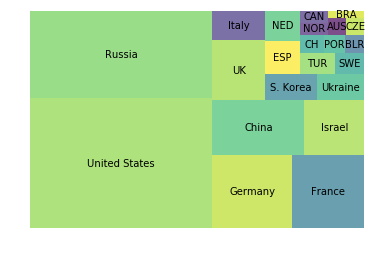

In [29]:
squarify.plot(sizes=[10304,6937,2535,2278,2192,1433,1365,670,585,535,507,471,311,267,186,172,152,150,144,134,133,111], label=["United States", "Russia", "Germany", "France", "China", "Israel","UK","Italy","S. Korea","Ukraine","ESP","NED","TUR","SWE","CH", "POR", "BLR", "NOR", "CAN", "AUS", "CZE","BRA"], alpha=.7 )
plt.axis('off')

#Save
plt.savefig('exporters_2016_treemap.pdf', transparent=False, bbox_inches='tight')
plt.savefig('exporters_2016_treemap.png', transparent=False, bbox_inches='tight')

In [ ]:
total = 31572

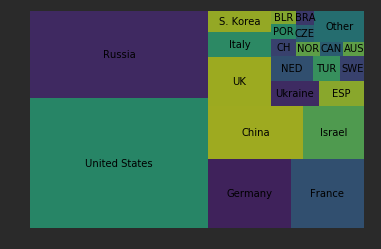

In [119]:
squarify.plot(sizes=[10304,6937,2535,2278,2192,1433,1365,670,585,535,507,471,311,267,186,172,152,150,144,134,133,111,691], label=["United States", "Russia", "Germany", "France", "China", "Israel","UK","Italy","S. Korea","Ukraine","ESP","NED","TUR","SWE","CH", "POR", "BLR", "NOR", "CAN", "AUS", "CZE","BRA", "Other"], alpha=.7 )
plt.axis('off')

#Save
plt.savefig('exporters_2016_treemap.pdf', transparent=False, bbox_inches='tight')
plt.savefig('exporters_2016_treemap.png', transparent=False, bbox_inches='tight')